In [ ]:
!pip install lat_lon_parser
!pip install geopy

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df= pd.read_csv('GlobalLandTemperaturesByMajorCity.csv',skipinitialspace=True)# toglie gli spazi

In [4]:
print(df.head(100))

            dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0   1849-01-01              26.704                          1.435  Abidjan   
1   1849-02-01              27.434                          1.362  Abidjan   
2   1849-03-01              28.101                          1.612  Abidjan   
3   1849-04-01              26.140                          1.387  Abidjan   
4   1849-05-01              25.427                          1.200  Abidjan   
..         ...                 ...                            ...      ...   
95  1856-12-01                 NaN                            NaN  Abidjan   
96  1857-01-01              26.549                          1.749  Abidjan   
97  1857-02-01                 NaN                            NaN  Abidjan   
98  1857-03-01              27.299                          1.263  Abidjan   
99  1857-04-01              26.069                          1.206  Abidjan   

          Country Latitude Longitude  
0   Côte D'Ivoire    5.6

In [5]:
df['dt']=pd.to_datetime(df['dt'])

In [6]:
df['Year']=df.dt.dt.strftime('%Y').astype(int) # converte la data mantenendo solo l'anno

In [7]:
period_length = 50
start_year=df['Year'].min()
end_year=df['Year'].max()
year_renge = end_year - start_year
modulo= year_renge%period_length
if modulo == 0:
    final_start=end_year-period_length
else:
    final_start=end_year-modulo
final_end=end_year+1

In [8]:
starts=np.arange(start_year, final_start, period_length).tolist()
starts

[1743, 1793, 1843, 1893, 1943]

In [9]:
tuples = [(start, start+period_length) for start in starts]
#aggiungiamo l'ultimo periodo
tuples.append(tuple([final_start, final_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')
tuples

[(1743, 1793),
 (1793, 1843),
 (1843, 1893),
 (1893, 1943),
 (1943, 1993),
 (1993, 2014)]

In [10]:
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))

In [11]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
Year                                      int32
dtype: object

In [12]:
# Assegna ad ogni riga un periodo
df['Period'] = pd.cut(df['Year'], bins=bins, include_lowest=True, precision=0)
df['Period'] = df['Period'].astype("str")
df = df.replace(label_dict)
bins

IntervalIndex([[1743, 1793), [1793, 1843), [1843, 1893), [1893, 1943), [1943, 1993), [1993, 2014)], dtype='interval[int64, left]')

In [13]:
print(df.head())

          dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  Year       Period  
0  Côte D'Ivoire    5.63N     3.23W  1849  1843 - 1892  
1  Côte D'Ivoire    5.63N     3.23W  1849  1843 - 1892  
2  Côte D'Ivoire    5.63N     3.23W  1849  1843 - 1892  
3  Côte D'Ivoire    5.63N     3.23W  1849  1843 - 1892  
4  Côte D'Ivoire    5.63N     3.23W  1849  1843 - 1892  


In [14]:
df2=df.groupby(['City','Period'], as_index=False).agg({'AverageTemperature':['mean','std']})

In [15]:
df2.columns=df2.columns.droplevel(0)
df2.columns=['City','Period','mean','std']
df2


,City,Period,mean,std
0,Abidjan,1843 - 1892,25.516638,1.335605
1,Abidjan,1893 - 1942,26.041790,1.350970
2,Abidjan,1943 - 1992,26.343050,1.336278
3,Abidjan,1993 - 2013,26.883399,1.360359
4,Addis Abeba,1843 - 1892,17.085043,1.173644
...,...,...,...,...
490,Xian,1793 - 1842,11.310949,9.276890
491,Xian,1843 - 1892,11.047334,9.441107
492,Xian,1893 - 1942,11.424725,9.516979
493,Xian,1943 - 1992,11.647688,9.359737


In [16]:
periods=df['Period'].unique()
period_city=dict.fromkeys(df['Period'].unique(),[])
print(period_city)
for p in df['Period'].unique():
    temp=df2[df2['Period']==p]
    period_city[p]=(temp.nlargest(10,'std')['City'].tolist())
print(period_city)
    

{'1843 - 1892': [], '1893 - 1942': [], '1943 - 1992': [], '1993 - 2013': [], '1793 - 1842': [], '1743 - 1792': []}
{'1843 - 1892': ['Harbin', 'Changchun', 'Shenyang', 'Montreal', 'Peking', 'Tianjin', 'Taiyuan', 'Tangshan', 'Dalian', 'Moscow'], '1893 - 1942': ['Harbin', 'Changchun', 'Shenyang', 'Montreal', 'Peking', 'Tianjin', 'Taiyuan', 'Tangshan', 'Dalian', 'Moscow'], '1943 - 1992': ['Harbin', 'Changchun', 'Shenyang', 'Montreal', 'Peking', 'Tianjin', 'Taiyuan', 'Tangshan', 'Dalian', 'Moscow'], '1993 - 2013': ['Harbin', 'Changchun', 'Shenyang', 'Montreal', 'Peking', 'Tianjin', 'Taiyuan', 'Tangshan', 'Moscow', 'Dalian'], '1793 - 1842': ['Harbin', 'Changchun', 'Shenyang', 'Montreal', 'Peking', 'Tianjin', 'Taiyuan', 'Dalian', 'Moscow', 'Tangshan'], '1743 - 1792': ['Montreal', 'Moscow', 'Toronto', 'Kiev', 'New York', 'Saint Petersburg', 'Aleppo', 'Chicago', 'Ankara', 'Berlin']}


In [17]:
import matplotlib.pyplot as plt
max(df2['mean'])

29.807483870967744

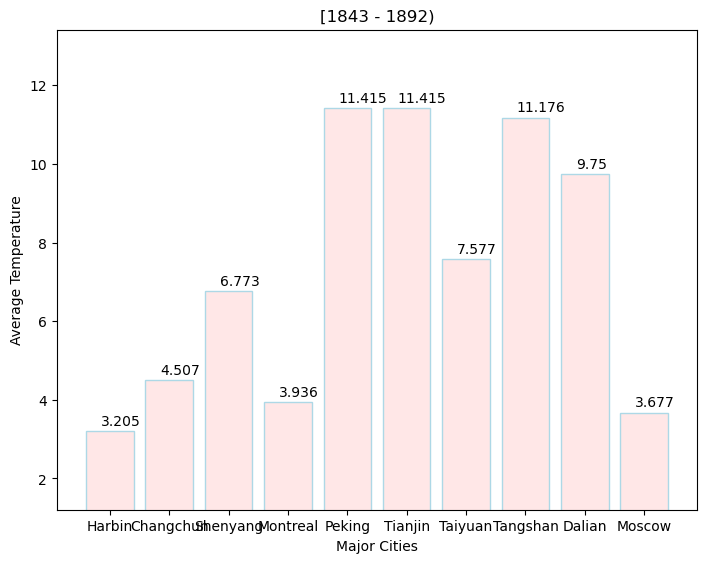

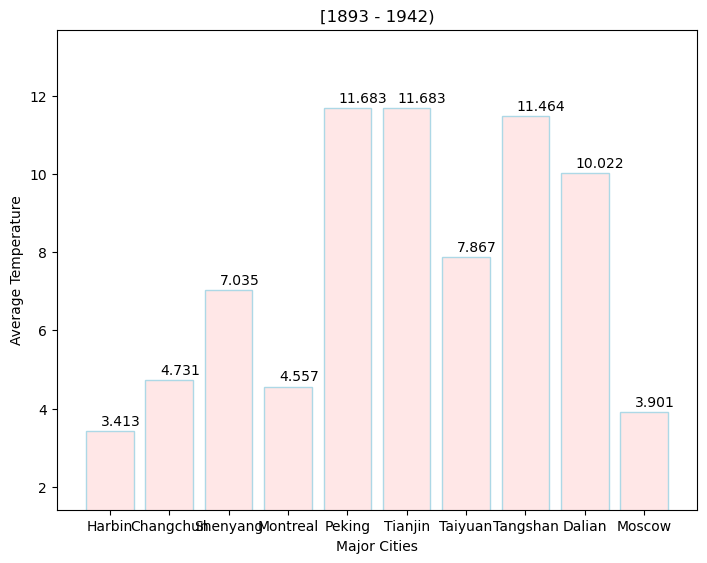

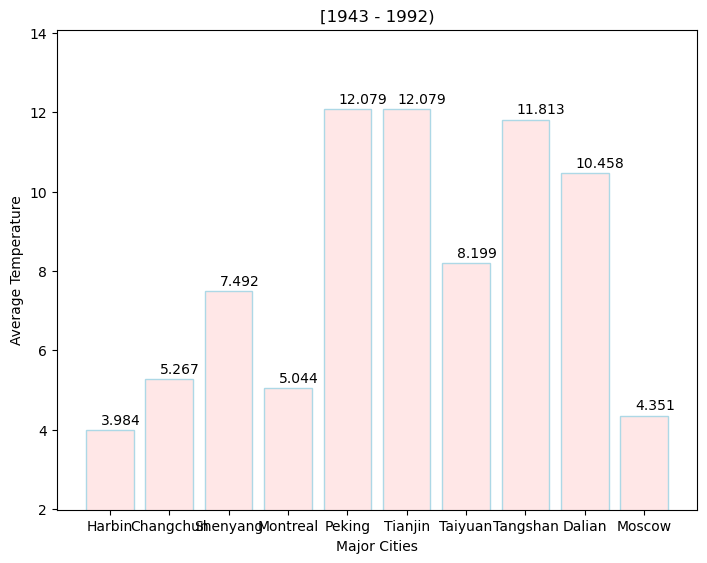

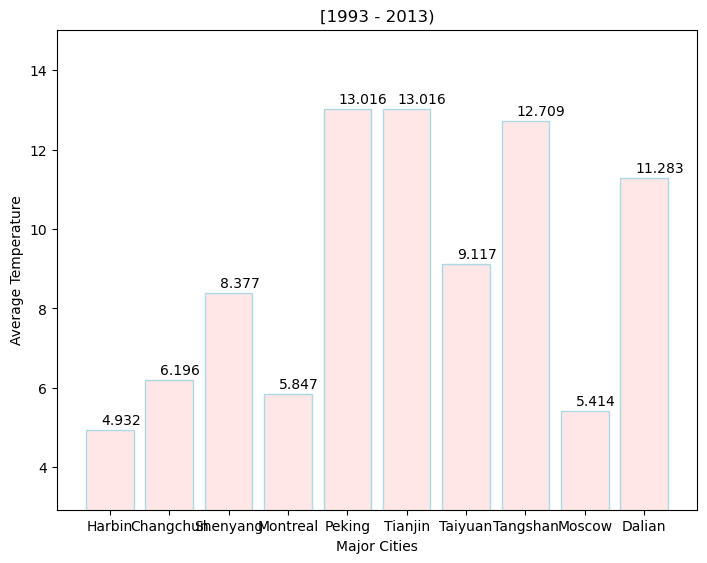

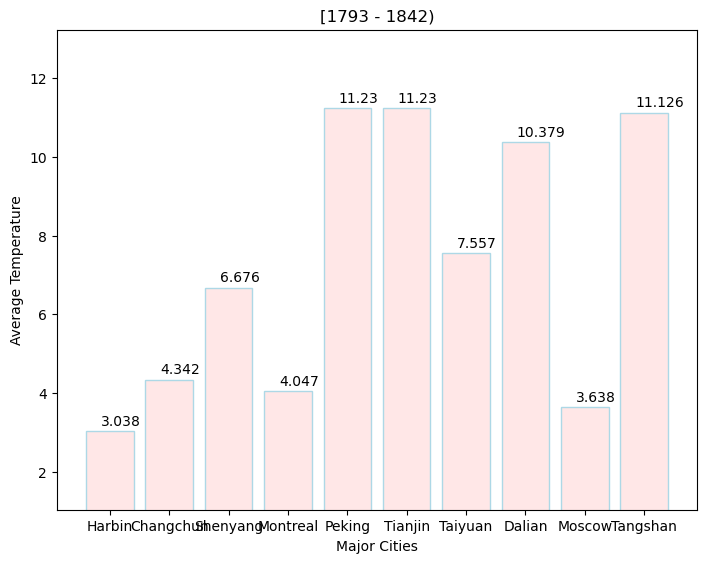

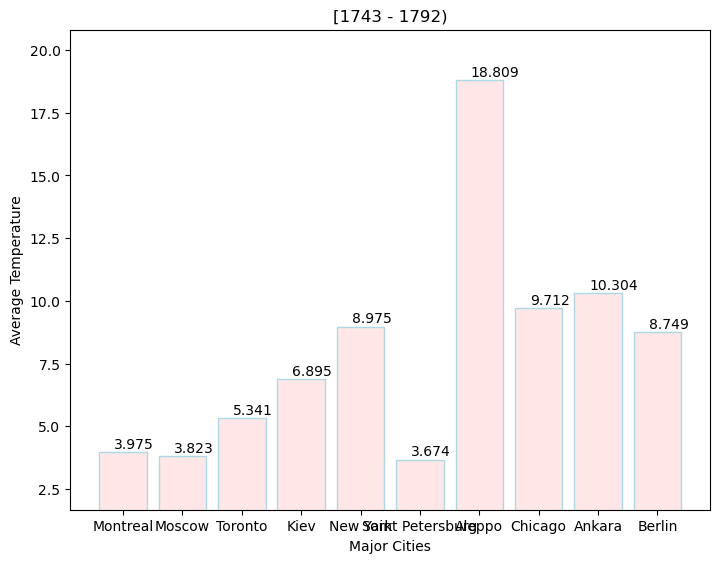

In [18]:
import math

for p in periods:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    cities=period_city[p]
    y_values = []
    for city in cities:
        subDf = df2[(df2['Period']==p) & (df2['City']==city)]
        y_values.append(subDf['mean'].item()) 
    ax.set_title('['+p+')')
    ax.bar(cities, y_values,  color=(1, 0.1, 0.1, 0.1),  edgecolor='lightblue')
    for i, v in enumerate(y_values):
        plt.text(i - 0.15, v + 0.15, str(round(v,3)))
    low = min(y_values)
    ax.set_ylabel('Average Temperature')
    ax.set_xlabel('Major Cities')
    high = max(y_values)
    ax.set_ylim([min(y_values)-2,max(y_values)+2])



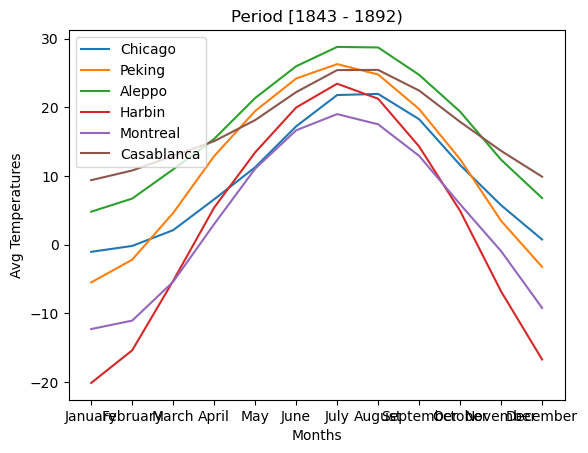

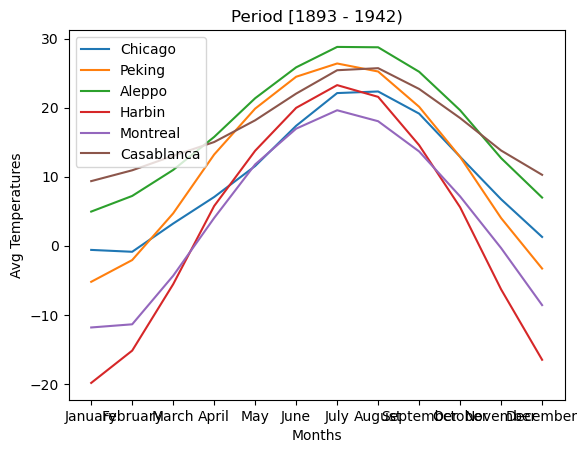

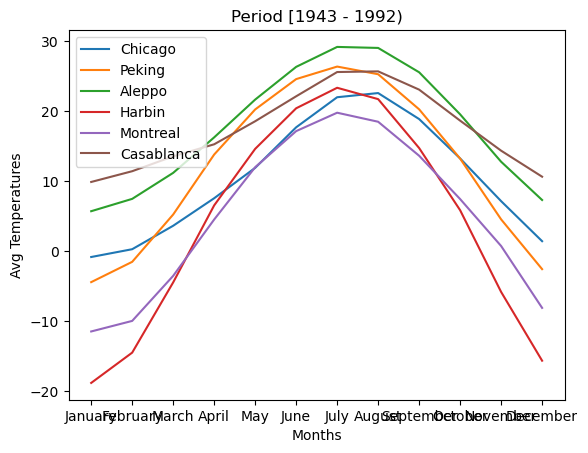

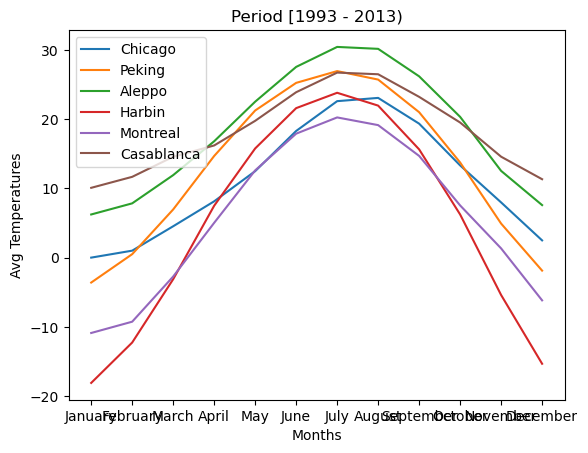

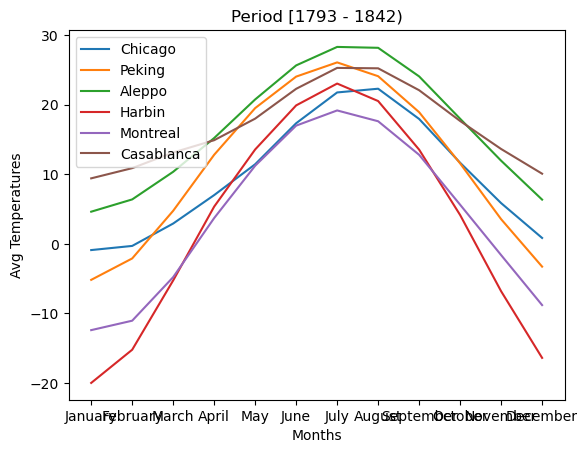

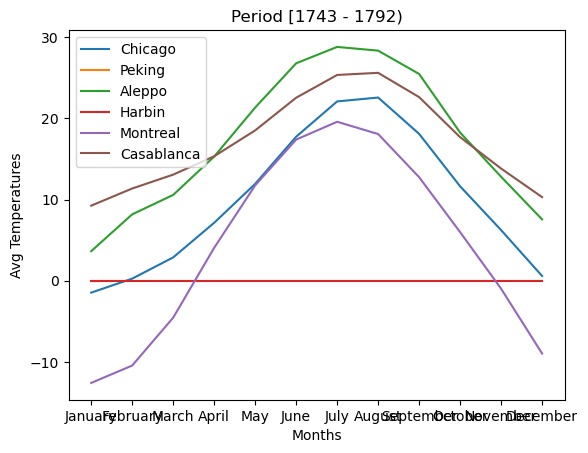

In [19]:
df['Month']=df.dt.dt.strftime('%m').astype(int)-1 # converte la data mantenendo solo l'anno

cities = ['Chicago', 'Peking', 'Aleppo', 'Harbin', 'Montreal', 'Casablanca']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


def plot_graph(period):
    data = []
    for city in cities:
        p1 = df[df['Period']==period]
        p2 = p1[p1['City']==city]
        p3=p2.groupby(['City','Period','Month'], as_index=False).agg({'AverageTemperature':['mean','std']})
        p3.columns=p3.columns.droplevel(0)
        p3.columns=['City','Period','Month','AverageTemperature', 'std']
        values = []
        for idx,oss in p3.iterrows():
            month = oss['Month']
            mean_temp = oss['AverageTemperature']
            values.append({'month': month, 'mean_temperature': mean_temp })
        data.append({'city': city, 'values': values })


    #PLOT *************************************

    import matplotlib.pyplot as plt
    import numpy as np
    x = months
    y_ = []

    all_y = []
    ordered_cities = []
    for city_data in data:
        l  = [0 for i in range(12)]
        ordered_cities.append(city_data['city'])
        for value in city_data['values']:
            idx_m = value['month']
            l[idx_m] = value['mean_temperature']
        all_y.append(l)

    i = 0
    for yi in all_y:
        plt.plot(x, yi, label=ordered_cities[i])
        i += 1

    plt.legend(loc="upper left")
    plt.xlabel("Months")
    plt.ylabel("Avg Temperatures")
    plt.title(f'Period [{period})')
    plt.show()

for period_i in periods:
    plot_graph(period_i)

# Calcolo per percorso Pechino-Los Angeles

In [20]:
temp = df[['City', 'Latitude','Longitude']]
list_of_cities = temp.groupby(by=["City", 'Latitude','Longitude']).sum().reset_index()

In [21]:
period = '1993 - 2013'
def getTemperature(df, periodo, citta):
    a = df[df['Period']==periodo]
    b = a[a['City']==citta]
    return (b['AverageTemperature'].tolist()[0])

list_of_cities_with_temperature = list_of_cities
all_temperatures = []
for idx, city in list_of_cities.iterrows():
    city_name = city[0]
    all_temperatures.append(getTemperature(df, period, city_name))
list_of_cities_with_temperature['AverageTemperature'] = all_temperatures

In [27]:
starting_city = list_of_cities_with_temperature[list_of_cities_with_temperature['City']=='Peking']
end_city = list_of_cities_with_temperature[list_of_cities_with_temperature['City']=='Los Angeles']

from lat_lon_parser import parse 
city_adjacencies = dict()
import geopy.distance

def distance(first_coordinates, second_coordinates):
    '''Calcolo della distanza tra due punti'''
    # Rimuove N e W al termine della stringa
    lat1 = parse(first_coordinates[0]) 
    lng1 = parse(first_coordinates[1])
    lat2 = parse(second_coordinates[0])
    lng2 = parse(second_coordinates[1])
    # Distanza in Km
    return geopy.distance.geodesic( (lat1,lng1),(lat2,lng2)).km


destination = end_city
destinationName = destination['City'].iloc[0]
destinationLatitude = destination['Latitude'].iloc[0]
destinationLongitude = destination['Longitude'].iloc[0]

currentPos = starting_city
currentCityName = starting_city['City'].iloc[0]

visited_cities = [currentPos]
visited_cities_names = [currentCityName]
while currentPos is not None:
    currentLatitude = currentPos['Latitude'].iloc[0]
    currentLongitude = currentPos['Longitude'].iloc[0]
    new_potential_position = {
        'name': None,
        'distance_from_prev': float('inf'),
        'temperature': -float('inf'),
        'distance_to_destination': float('inf'),
    }

    for idx, potential_city in list_of_cities_with_temperature.iterrows():
        potential_city_name = potential_city[0]
        if (currentCityName == potential_city_name):
            # escludiamo la città stessa
            continue
        if (potential_city_name in visited_cities_names):
            # escludiamo le città già visitate
            continue 
     
        distance_from_current_to_potential = distance((currentLatitude,currentLongitude), (potential_city[1],potential_city[2]))
        distance_from_potential_to_destination = distance((potential_city[1],potential_city[2]), (destinationLatitude,destinationLongitude))
        
      
        if (
            new_potential_position['distance_from_prev'] >= distance_from_current_to_potential 
            and new_potential_position['distance_to_destination'] >= distance_from_potential_to_destination 
            and new_potential_position['temperature'] <= potential_city[3] 
            and potential_city_name not in visited_cities_names):
            new_potential_position = {
                'name': potential_city_name,
                'distance_from_prev': distance_from_current_to_potential,
                'temperature': potential_city[3],
                'distance_to_destination': distance_from_potential_to_destination,
            }

    if new_potential_position['name'] is None:
        currentPos = None
    else:
        visited_cities_names.append(new_potential_position['name'])
        if new_potential_position['name'] == destinationName:
            currentPos = None
        else:
            currentPos = list_of_cities[list_of_cities['City']== new_potential_position['name']]
            visited_cities.append(currentPos)


print(visited_cities_names)

['Peking', 'Abidjan', 'Dakar', 'Fortaleza', 'Belo Horizonte', 'Bogotá', 'Santo Domingo', 'Brasília', 'Cali', 'Ibadan', 'Kano', 'Lagos', 'Kinshasa', 'Luanda', 'Addis Abeba', 'Jiddah', 'Ahmadabad', 'Chongqing', 'Guangzhou', 'Manila', 'Nagoya', 'Taipei', 'Aleppo', 'Alexandria', 'Izmir', 'Istanbul', 'Ankara', 'Gizeh', 'Cairo', 'Baghdad', 'Bombay', 'Hyderabad', 'Madras', 'Bangalore', 'Bangkok', 'Tokyo', 'Los Angeles']
